## Observations and Insights

My observationsa are as follows there is a positive coreelation between mouse size and average Tumor volume. in the spacific case of mouse s185 the treatment was effective and the tumor shrank, though this was not the case across the board. Capomulin had a comparitively tight data set. gender was almost perfectly even, and thus did not bias our data. The total number of test is statistically significant with Capomulin being in the lead. 


## Dependencies and starter code

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata

study_results

combined_meta_mouse = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_meta_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
mean_tumor = pd.DataFrame(combined_meta_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean())
mean_tumor = mean_tumor.rename(columns={"Tumor Volume (mm3)": "Mean Vol (mm3)"})
mean_tumor

# Median
Median_tumor = pd.DataFrame(combined_meta_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median())
Median_tumor = Median_tumor.rename(columns={"Tumor Volume (mm3)": "median Vol (mm3)"})
Median_tumor

# Variance
Var_tumor = pd.DataFrame(combined_meta_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var())
Var_tumor = Var_tumor.rename(columns={"Tumor Volume (mm3)": "variance (mm3)"})
Var_tumor

# Standard Dev
STD_tumor = pd.DataFrame(combined_meta_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std())
STD_tumor = STD_tumor.rename(columns={"Tumor Volume (mm3)": "St-Dv (mm3)"})
STD_tumor

# standard error
SEM_tumor = pd.DataFrame(combined_meta_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem())
SEM_tumor = SEM_tumor.rename(columns={"Tumor Volume (mm3)": "Standard error (mm3)"})
SEM_tumor

# 4 step Merge
Med_mode_df = pd.merge(mean_tumor, Median_tumor,  how='left', left_on=['Drug Regimen'], right_on = ['Drug Regimen'])
Med_mode_df
Var_STD = pd.merge(Var_tumor, STD_tumor,  how='left', left_on=['Drug Regimen'], right_on = ['Drug Regimen'])
Var_STD
Var_STD_Med_mode_df = pd.merge(Med_mode_df, Var_STD,  how='left', left_on=['Drug Regimen'], right_on = ['Drug Regimen'])
Var_STD_Med_mode_df
Var_STD_Med_mode_SEM_df = pd.merge(Var_STD_Med_mode_df, SEM_tumor,  how='left', left_on=['Drug Regimen'], right_on = ['Drug Regimen'])
Var_STD_Med_mode_SEM_df

,Mean Vol (mm3),median Vol (mm3),variance (mm3),St-Dv (mm3),Standard error (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots


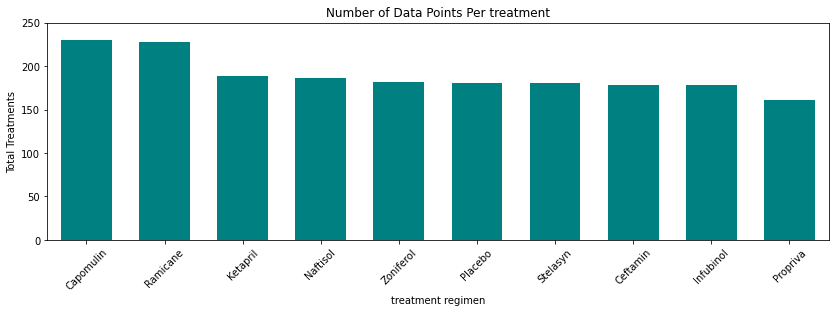

In [311]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
col_one_list = Var_STD_Med_mode_SEM_df.index
col_one_list = col_one_list.tolist()
col_one_list
combined_meta_mouse
Drug_Regimen = pd.DataFrame(combined_meta_mouse["Drug Regimen"].value_counts())
Drug_Regimen = Drug_regimen.rename(columns={"Data Points": "Total Treatments"})
Drug_Regimen
Drug_Regimen.plot.bar(y="Total Treatments", width=0.65, color="teal", legend=False)
plt.ylabel("Total Treatments")
plt.xlabel('treatment regimen')
plt.title("Number of Data Points Per treatment")
plt.xlim(-0.5,9.5)
plt.ylim(0,250)
plt.xticks(rotation=45)
plt.rcParams["figure.figsize"] = (14, 4)
plt.show()
# Set the 'Country Code' to be our index for easy referencing of rows
# Plot the bar graph

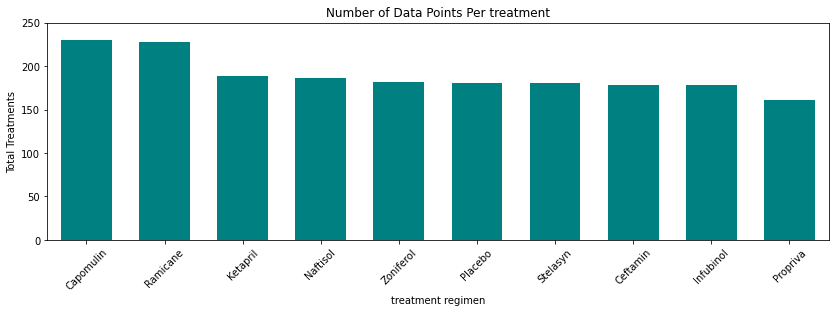

TypeError: 'DataFrame' object is not callable

In [319]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Drug_regimen.plot.bar(y="Data Points", width=0.65, color="teal", legend=False)
plt.ylabel("Total Treatments")
plt.xlabel('treatment regimen')
plt.title("Number of Data Points Per treatment")
plt.xlim(-0.5,9.5)
plt.ylim(0,250)
plt.xticks(rotation=45)
plt.rcParams["figure.figsize"] = (14, 4)
plt.show()

## Pie plots

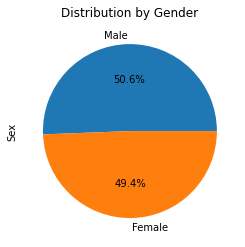

In [297]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Mouse_gender = combined_meta_mouse.Sex.value_counts()
Mouse_gender.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution by Gender")

plt.show()

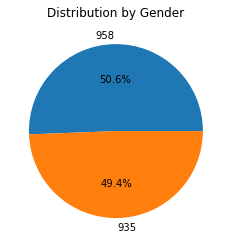

In [298]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Mouse_gender.values, labels=Mouse_gender.values, autopct="%1.1f%%")
plt.title("Distribution by Gender")
plt.show()

## Quartiles, outliers and boxplots

In [205]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers
IQR = combined_meta_mouse.groupby("Mouse ID").max()
#Reconfigure the index from groupby function
Reconfigure = IQR.reset_index()
#Create a new variable using columns of interest
New_outlier = Variable[["Mouse ID", "Timepoint"]].merge(combined_meta_mouse, on=["Mouse ID", "Timepoint"], how="left")
#Capomulin, Ramicane, Infubinol, and Ceftamin Analysis
Capomulin = New_outlier.loc[New_outlier["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
Ramicane = New_outlier.loc[New_outlier["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
Infubinol = New_outlier.loc[New_outlier["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin = New_outlier.loc[New_outlier["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]


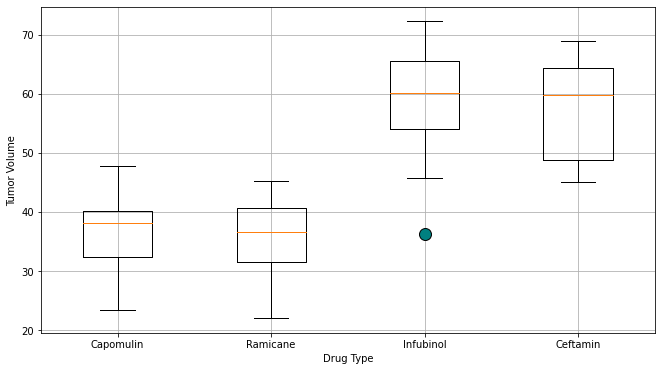

In [238]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker = dict(markerfacecolor="teal", markersize=12)
plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin], labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=marker)
plt.xlabel("Drug Type")
plt.ylabel("Tumor Volume")
plt.rcParams["figure.figsize"] = (7, 6)
plt.grid()
plt.show()

## Line and scatter plots

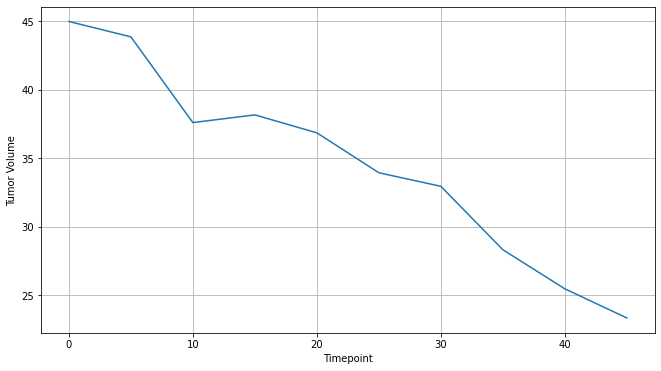

In [240]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_interest = combined_meta_mouse.loc[combined_meta_mouse["Drug Regimen"]== "Capomulin"]
Choice = Capomulin_interest.loc[Capomulin_interest["Mouse ID"]== "s185"]
plt.plot(Choice["Timepoint"], Choice["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.rcParams["figure.figsize"] = (11, 4)
plt.grid()
plt.show()

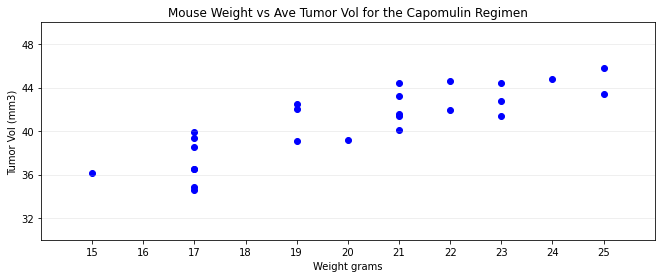

In [256]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capo_reg = combined_meta_mouse[combined_meta_mouse["Drug Regimen"]== "Capomulin"]
Ave_capo = Capo_reg.groupby("Mouse ID")["Tumor Volume (mm3)", "Weight (g)"].mean()
weights = Ave_capo["Weight (g)"]
Tumor_volume = Ave_capo["Tumor Volume (mm3)"]

plt.scatter(weights, Tumor_volume, color="blue", marker="o") 
plt.ylabel("Tumor Vol (mm3)")
plt.xlabel("Weight grams")
plt.title("Mouse Weight vs Ave Tumor Vol for the Capomulin Regimen")

plt.xticks(range(15,26))
plt.yticks(np.arange(20, 52, step=4))
plt.grid(b=None, which="major", axis="y", alpha=0.25)
plt.xlim(14,26)
plt.ylim(30,50)
plt.show()

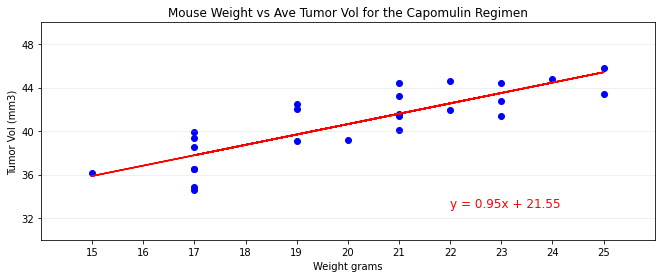

y = 0.95x + 21.55


In [290]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
from matplotlib import pyplot as plt
from scipy.stats import linregress


Capo_reg = combined_meta_mouse[combined_meta_mouse["Drug Regimen"]== "Capomulin"]
Ave_capo = Capo_reg.groupby("Mouse ID")["Tumor Volume (mm3)", "Weight (g)"].mean()
weights = Ave_capo["Weight (g)"]
Tumor_volume = Ave_capo["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, Tumor_volume)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weights, Tumor_volume, color="blue", marker="o") 
plt.plot(weights, regress_values,"r-")

plt.ylabel("Tumor Vol (mm3)")
plt.xlabel("Weight grams")
plt.title("Mouse Weight vs Ave Tumor Vol for the Capomulin Regimen")

plt.xticks(range(15,26))
plt.yticks(np.arange(20, 52, step=4))
plt.grid(b=None, which="major", axis="y", alpha=0.25)
plt.xlim(14,26)
plt.ylim(30,50)
plt.annotate(line_eq,(22,33),fontsize=12,color="red")

plt.show()
print(line_eq)
